>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 통계적 관계 시각화
Visualizing statistical relationships

통계분석(stastical analysis)는 데이터셋의 변수들간의 관계와 그 관계의 의존성을 이해하는 프로세스 라고 할 수 있습니다. (데이터를 제대로 시각화한다는 가정 하에) 사람의 시각은 관계를 나타내는 추세와 패턴을 볼 수 있기 때문에 시각화는 통계분석에서 핵심 요소라고 입니다.  
<br>
이 튜토리얼에서는 seaborn의 3가지 function에 대해 알아보겠습니다. 가장 많이 사용하는 `relplot()` 은 두 가지 접근법(scatter, line)을 통해 통계적 관계를 시각화하는 figure-level function 입니다. `relplot()`은 `FacetGrid`를 axes-level function 둘 중 하나와 결헙합니다 :  
* `kind="scatter"`인 `scatterplot()` 
* `kind="line"`인 `lineplot()`  

<br>
앞으로 자세히 살펴보겠지만, 이 함수들은 간단하고 이해하기 쉬운 데이터 표현을 사용합니다. 그러면서도
 색조(hue), 크기(size), 스타일(style)을 이용해사 2차원 그래픽에 최대 3개의 추가 변수를 맵핑할 수 있습니다. 덕분에 쉬운 표현으로 복잡한 데이터 집합 구조를 나타낼 수 있게 되는, 매우 유용한 함수입니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

## 1. scatter plot :  변수 간의 관계 나타내기
Relating variables with scatter plots

scatter plot(산점도) 은 통계 시각화의 핵심이라고 할 수 있습니다. 
scatter plot 에서 각 점(point)은 데이터셋의 관측값을 나타내는데, 점이 뭉쳐진 정도(point cloud)를 통해 두 변수 간의 공동 분포(joint distribution)을 표현합니다. 
그리고 우리의 눈은 이런 묘사를 통해 두 변수 간에 의미 있는 관계가 있는지에 대해 상당한 양의 정보를 유추할 수 있습니다. 
<br>  
seaborn에는 scatter plot을 그리는 몇가지 방법이 있습니다. 
먼저 `scatterplot()` function 은 가장 기본적인 scatter plot 방법으로, 두 변수가 모두 수치형(numeric)일 때 사용합니다. 범주형 데이터를 scatter plot으로 시각화 하는 방법에 대해서는 나중에 [categorical visulization tutorial](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)에서 살펴보겠습니다. `scatterplot()`은 `relplot()`의 기본 그래프종류(default kind; `kind="scatter"`)입니다. 

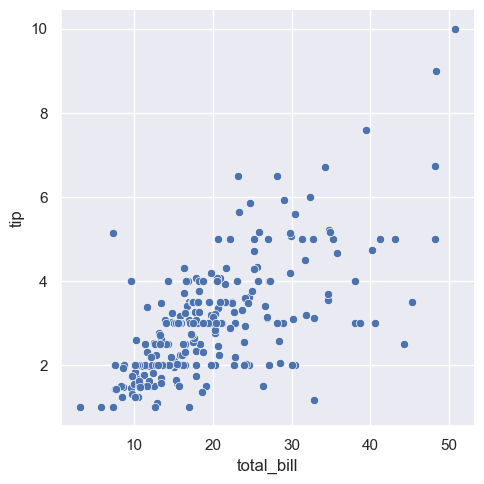

In [2]:
tips = sns.load_dataset('tips')
sns.relplot(data=tips, x='total_bill', y='tip');

지금 point는 2차원에 표현되고 있습니다. 만약 여기서 다른 3번째 변수를 표현하고 싶다면, point에 색을 추가해서 표현할 수 있습니다. 
point의 색은 임의의 컬러가 아니라 의미를 갖기 때문에, seaborn에서는 '색조 의미(hue semantic)'를 사용한다고 표현합니다.

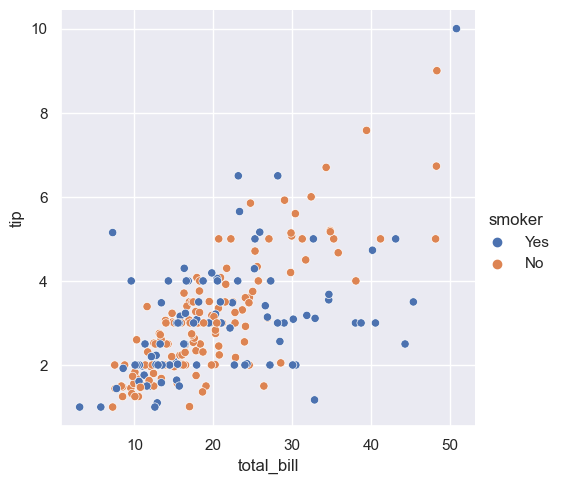

In [3]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker');

두 비교집단(class) 간의 차이를 강조하고 식별성을 높이고 싶다면 비교집단마다 다른 marker style을 사용하면 됩니다.

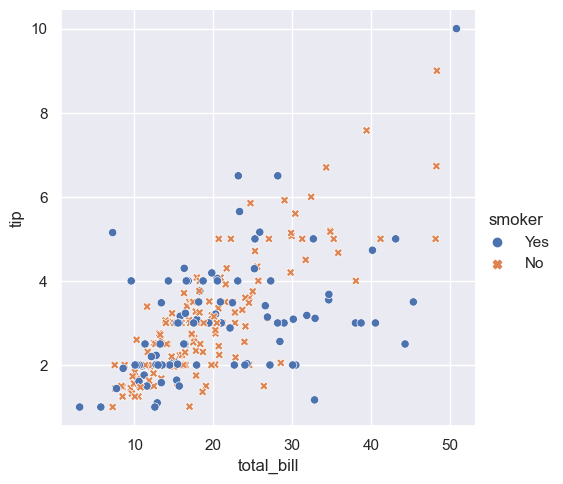

In [4]:
sns.relplot(data=tips, x='total_bill', y='tip', 
            hue='smoker', style='smoker');

hue와 style을 서로 다르게 지정하면 최대 4개의 변수까지 표현할 수 있습니다. 하지만 사람의 눈은 모양(shape)에는 색상(color)보다 덜 민감하기 때문에, 이렇게 표현할 때는 주의가 필요합니다.

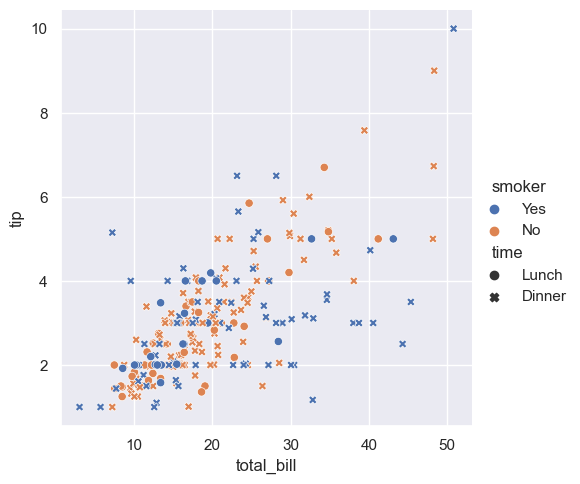

In [5]:
sns.relplot(data=tips, x='total_bill', y='tip',
           hue='smoker', style='time');

위 예에서 hue semantic은 범주형(categorical)이기 때문에 [정석적 색상표(qualitativ palette)](https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes)가 기본으로 적용되었습니다. 
hue semantic이 수치형(numeric)인 경우 (특히 float으로 cast될 수 있는 경우), 기본 적용 색상은 연속적 색상표(sequential palette)로 변경됩니다.

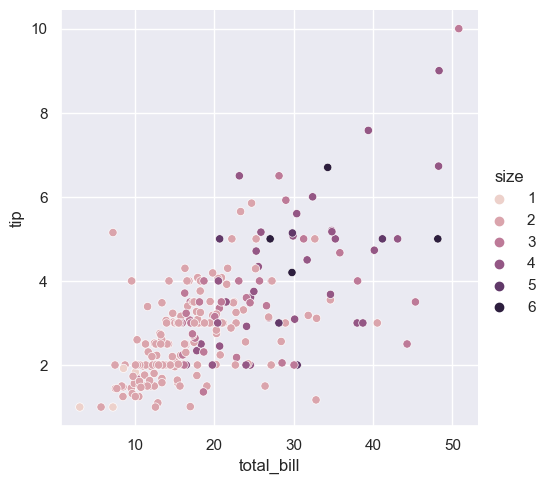

In [6]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='size');

hue semantic에 수치형, 범주형을 사용할 때 모두 color palette를 커스터마이즈 할 수 있습니다. 
커스터마이징에는 여러 방법이 있습니다. 
여기서는 문자열 인터페이스(string interface)를 이용해서 [`cubehelix_palette()`](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette)의 sequential palette로 커스터마이즈 하겠습니다 :

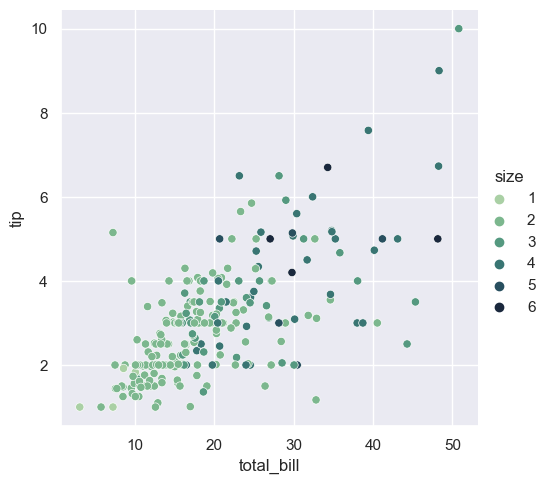

In [7]:
sns.relplot(
    data=tips,
    x='total_bill', y='tip',
    hue='size', palette='ch:r=-.5, l=.75'
);

3번째 semantic 변수는 각 point의 크기를 변경합니다 :

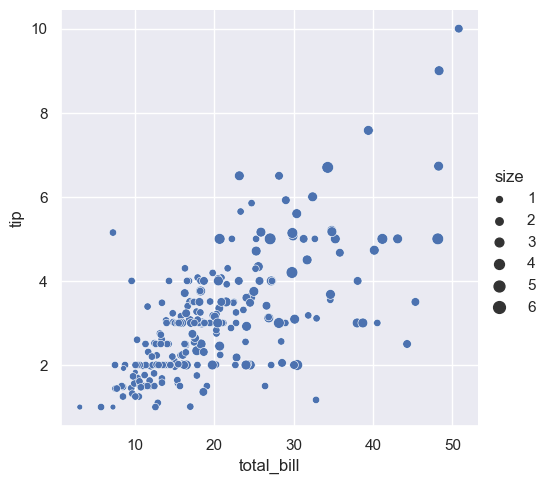

In [8]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size');

`matplotlib.pyplot.scatter()`과 달리, seaborn의 scatterplot()에서는 변수의 값(value)이 point의 면적(area)에 그대로 반영되지 않습니다. 대신, '데이터 값의 범위'가 '면적의 범위'로 정규화됩니다. 여기서의 범위는 사용자가 지정할 수 있습니다.

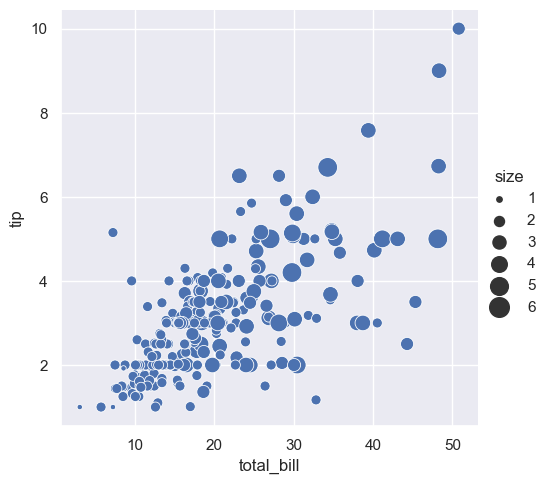

In [9]:
sns.relplot(
    data=tips, x='total_bill', y='tip',
    size='size', sizes=(15, 200));

통계적 관계(statistical relationship)을 표현하기 위한 semantic을 커스터마이즈하는 더 자세한 방법은 [`scatterplot()` API 예제](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)를 참고해주세요.   
<br>   

## 2. line plot : 연속성 강조
Emphasizing continuity with line plots

scatter plot은 아주 효과적입니다. 하지만 상황에 따라서는 더 좋은 시각화 방법이 있을 수 있습니다. 데터셋과 플롯을 통해 답하고자 하는 질문이 무엇인지를 먼저 생각하고 방법을 결정해야 합니다.  
  
예를 들어, 시계열에 따른 어떤 변수의 변화를 보고 싶다면 line plot을 그려보는 것이 좋습니다. seaborn에서는 `lineplot()` 함수를 직접 사용하거나, `relplot()`에서 `kind='line'`으로 설정하여 그려볼 수 있습니다.

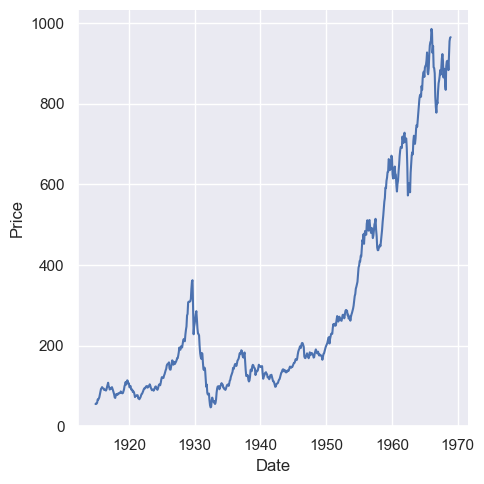

In [10]:
dowjones = sns.load_dataset('dowjones')
sns.relplot(data=dowjones, x='Date', y='Price', kind='line');

### 집계 및 불확실성 표현하기
Aggregation and representing uncertainty

더 복잡한 데이터셋에서는 동일한 변수 `x`에 대한 여러 측정값이 있을 것입니다. 이럴 경우 seaborn은 기본적으로 각 x값에서 여러 측정값을 집계하고, 평균과 평균의 95% 신뢰구간(confidence interval)을 플로팅합니다.

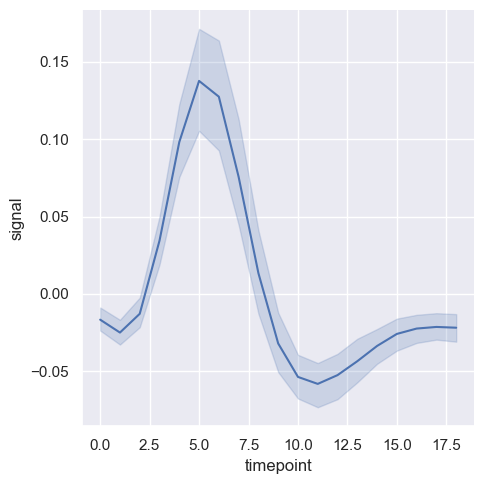

In [11]:
fmri = sns.load_dataset('fmri')
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line');

집계(aggregation)기능을 없애려면, `estimator` parameter를 `None`으로 설정하세요. 하지만 데이터가 포인트마다 여러 측정값이 있을 경우 이상한 그래프가 나올 수 있으니 주의하세요.

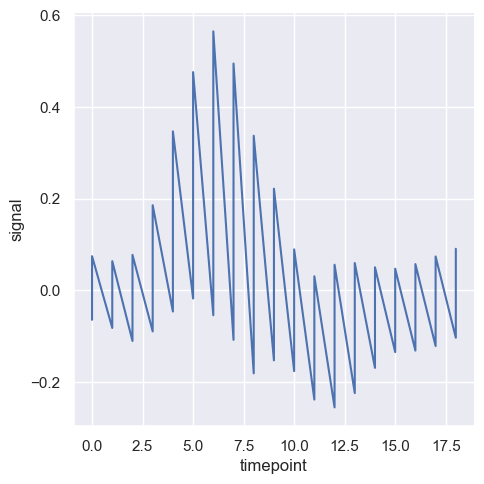

In [12]:
sns.relplot(
    data=fmri, kind='line', x='timepoint', y='signal',
    estimator=None);

### 시맨틱 맵핑으로 하위집단 데이터 플롯하기
Plotting subsets of data with semantic mappings

`lineplot()` 함수는 `scatterplot()`처럼 유연합니다 : plot의 요소(hue, size, style)를 통해 최대 3개의 변수를 추가적으로 표현할 수 있습니다. `scatterplot()` 과 같은 API를 사용하기 때문에, matplotlib에서 parameter를 설정할 때 line, point을 구분하여 고민할 필요가 없어집니다.
<br>  
`lineplot()`의 semantic을 어떻게 사용하느냐에 따라 데이터가 집계되는 방식도 달라집니다. 예를 들어, hue semantic을 추가하면, plot은 2개의 선(line)과 오류구간(error bands)로 분할되고, 각각에 색상을 지정하여 어느 하위집단에 속하는지 나타냅니다.

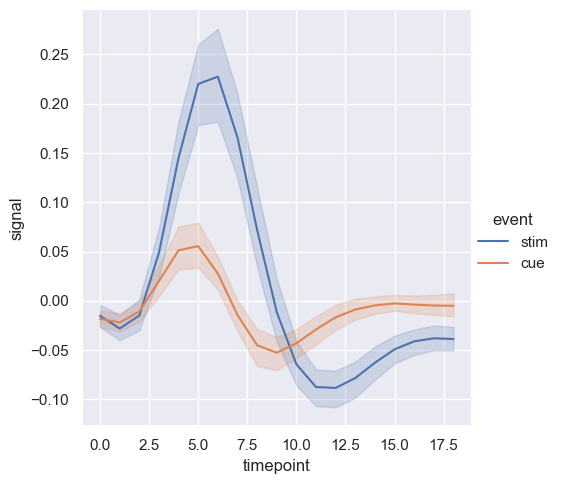

In [13]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue="event");

line plot에 style semantic을 추가하면 선(line)의 점선 스타일(dash patern)이 변경됩니다.

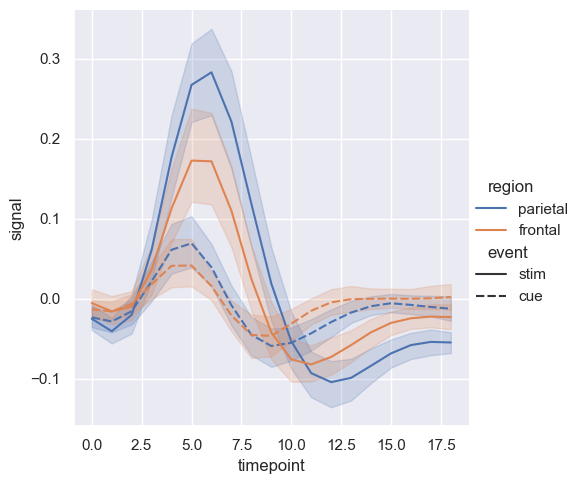

In [14]:
sns.relplot(data=fmri, kind='line', x='timepoint', y='signal',
           hue='region', style='event');

각각의 subset(하위집단)을 구별하고 싶다면 marker를 사용하면 됩니다. 이 때 marker는 dash와 같이 사용하는 것도 가능합니다.

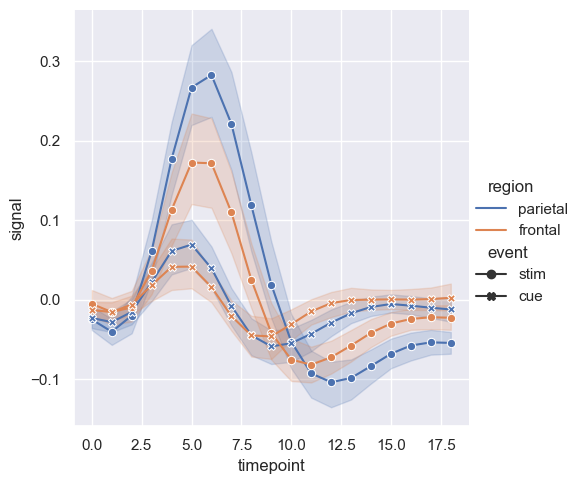

In [15]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", 
            hue="region", style="event", dashes=False, markers=True);

scatter plot 과 마찬가지로, line plot에서도 다중 semantic을 사용할 때는 주의해야 합니다. 잘 사용하면 많은 정보를 담아서 좋기도 하지만, 구분이나 해석이 어려워질 수도 있습니다. 하나의 추가 변수에 대한 변화만을 보고자 할 때는 line의 color, style 모두를 한꺼번에 변경하는 것을 추천합니다. 이렇게 하면 흑백으로 출력하거나 색맹인 있는 사람들에게도 효과적으로 정보를 전달할 수 있습니다.

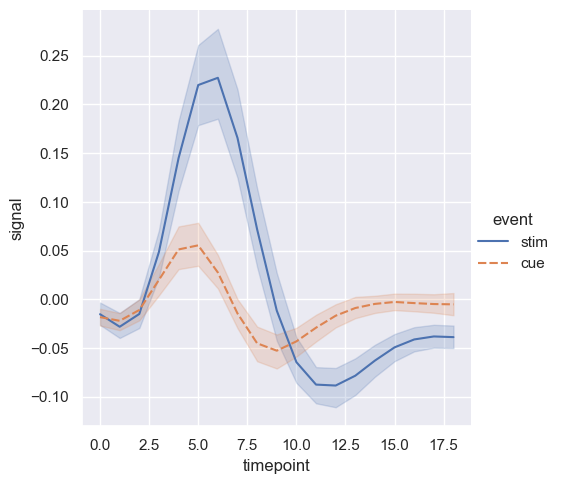

In [16]:
sns.relplot(data=fmri, kind='line', x='timepoint', y='signal',
           hue='event', style='event');

반복 측정(여러번 샘플링된 값) 데이터를 다룰 때에는, semantic을 별도로 설정하지 않고도 각각의 측정값(sampling data)을 표현할 수 있습니다. 이렇게 하면 범례가 복잡해지는 것을 방지할 수 있습니다 :

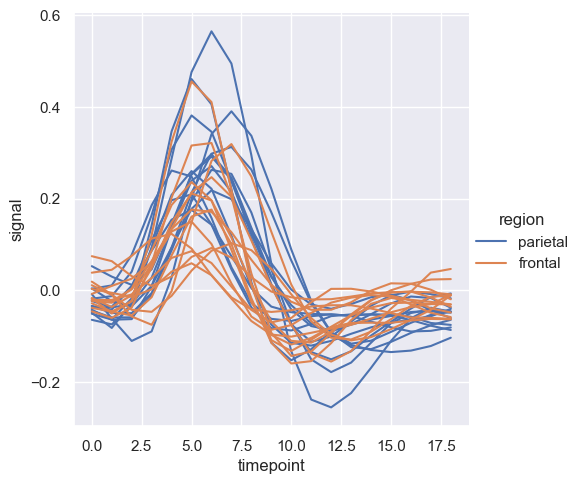

In [17]:
sns.relplot(data=fmri.query("event == 'stim'"), kind='line',
            x='timepoint', y='signal', hue='region',
            units='subject', estimator=None);

`lineplot()`의 기본 컬러맵(colormap)과 범례(legend)는 semantic이 범주형(categorical)인지, 숫자형(numeric)인지에 따라 달라집니다 :

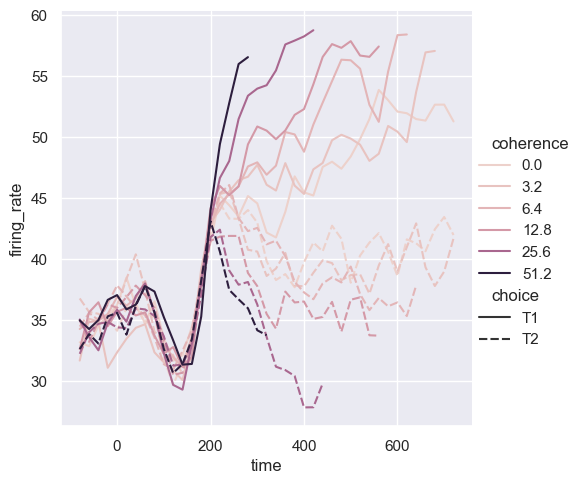

In [18]:
dots = sns.load_dataset('dots').query("align == 'dots'")
sns.relplot(data=dots, kind='line', x='time', y='firing_rate',
           hue='coherence', style='choice');

`hue` 변수가 수치형(numeric)이더라도 선형 컬러 스케일(linear color scale)로 표현되지 않기도 합니다. 여기서는 `hue` 변수의 레벨이 대수적으로 스케일링되어 있습니다. list나 dictionary로 각 line에 특정 색상 값을 지정할 수도 있습니다.

/var/folders/48/rp3jrl0n4d114g_6b09p39700000gn/T/ipykernel_4888/1450547288.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.relplot(data=dots, kind='line', x='time', y='firing_rate',


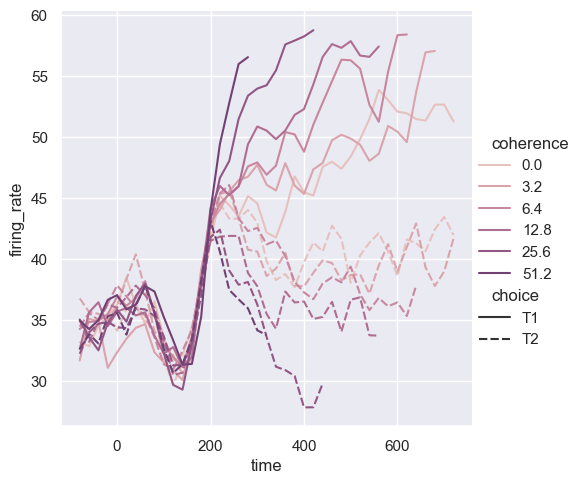

In [19]:
palette = sns.cubehelix_palette(light=.8, n_colors=8)
sns.relplot(data=dots, kind='line', x='time', y='firing_rate',
           hue='coherence', style='choice', palette=palette);

혹은 colormap의 정규화(normalized) 방식을 변경할 수도 있습니다.

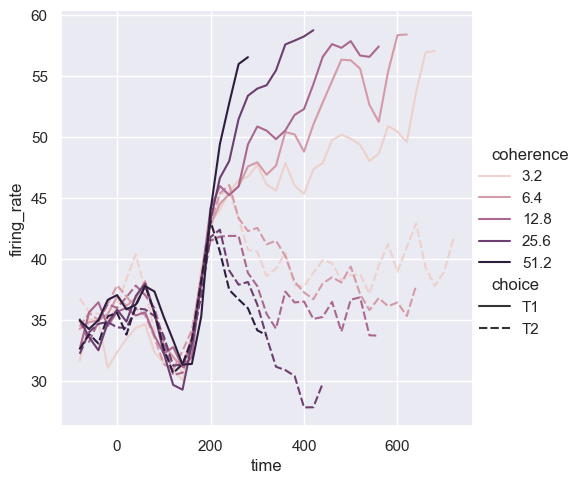

In [20]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(data=dots.query('coherence > 0'), kind='line',
           x='time', y='firing_rate', hue='coherence', style='choice',
           hue_norm=LogNorm());

3번째 semantic인 size는 line의 폭(width)를 변경합니다.

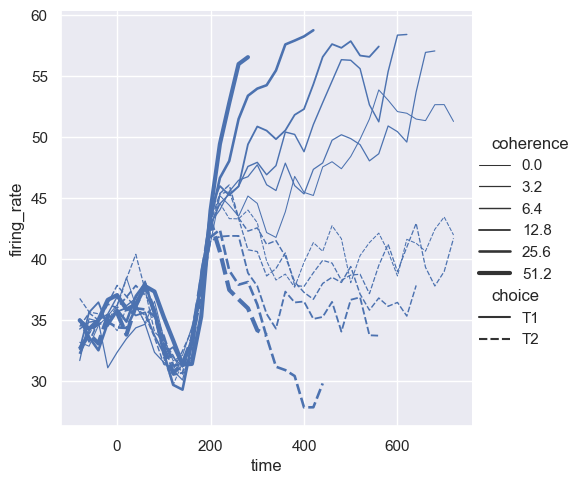

In [21]:
sns.relplot(data=dots, kind='line', x='time', y='firing_rate',
           size='coherence', style='choice');

`size` 변수는 기본적으로 수치형이지만, line의 width는 범주형 변수로 맵핑하는 것도 가능합니다. 
이 방법은 얇은(thin)선이 굵은(thick)선에 비해 식별성이 확연히 떨어진다는 점을 유의해서 사용해야 합니다. 
선의 변동성(high-frequency variability)이 큰 경우에는 dash보다는 width를 사용하는 것이 좋습니다.

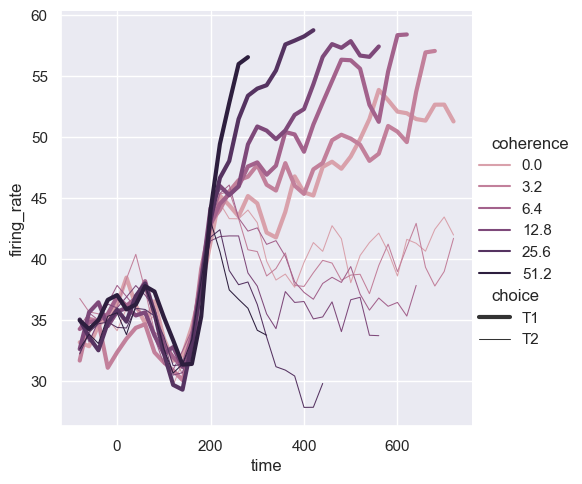

In [22]:
sns.relplot(data=dots, kind='line', x='time', y='firing_rate',
           hue='coherence', size='choice', palette=palette);

### 정렬·방향 제어하기
Controlling sorting and orientation

`lineplot()`은 우리가 `x`에 대한 `y`의 함수를 그린다고 가정합니다. 그래서 기본적으로 plot을 그리기 전에 `x`의 값으로 데이터를 정렬(sort)합니다. (이 기능을 없앨 수도 있습니다.)

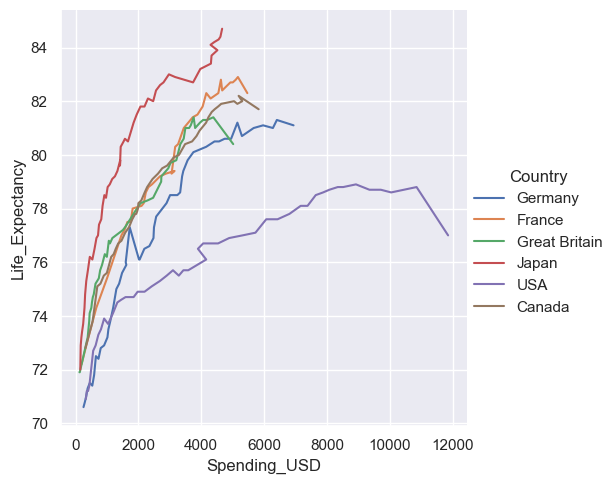

In [23]:
healthexp = sns.load_dataset('healthexp').sort_values('Year')
sns.relplot(data=healthexp, kind='line',
           x='Spending_USD', y='Life_Expectancy', hue='Country',
           sort=False);

혹은 y축에 대해서 정렬하고 집계하는 것도 가능합니다.

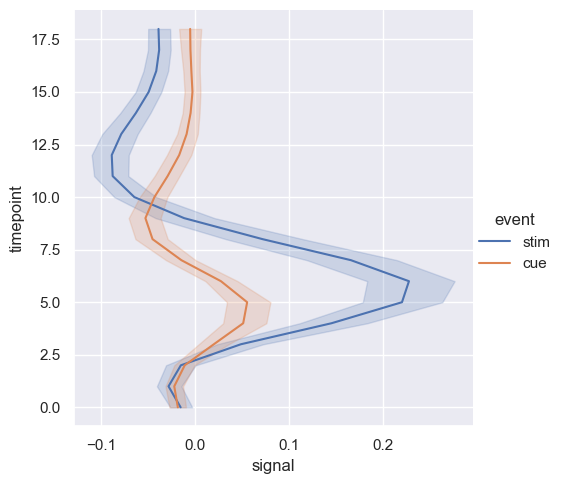

In [24]:
sns.relplot(data=fmri, kind='line', 
            x='signal', y='timepoint', hue='event', 
            orient='y');

## Facet(면 분할)로 여러 관계성 나타내기

우리는 위에서 function으로 여러 개의 semantic 변수를 표현할 수는 있지만, 효과적이지 않을 수 있으니 주의해야 한다고 배웠습니다. 
그럼에도 불구하고 두 변수 간의 관계가 또다른 변수에 어떤 영향을 받는지 표현하고 싶으면 어떡해야 할까요?   
가장 좋은 방법은 plot을 더 만드는 것입니다. 이건 `relplot`이 `FacetGrid`를 기반으로 하기 때문에 쉽습니다. 
추가적인 변수의 영향을 보여주려면 semantic에 할당하는 대신 "facet"을 사용해보세요. 
여러 개의 축(axes)fmf 만들고, 각 축에 데이터의 subset(하위집단)을 plot하여 시각화할 수 있습니다.

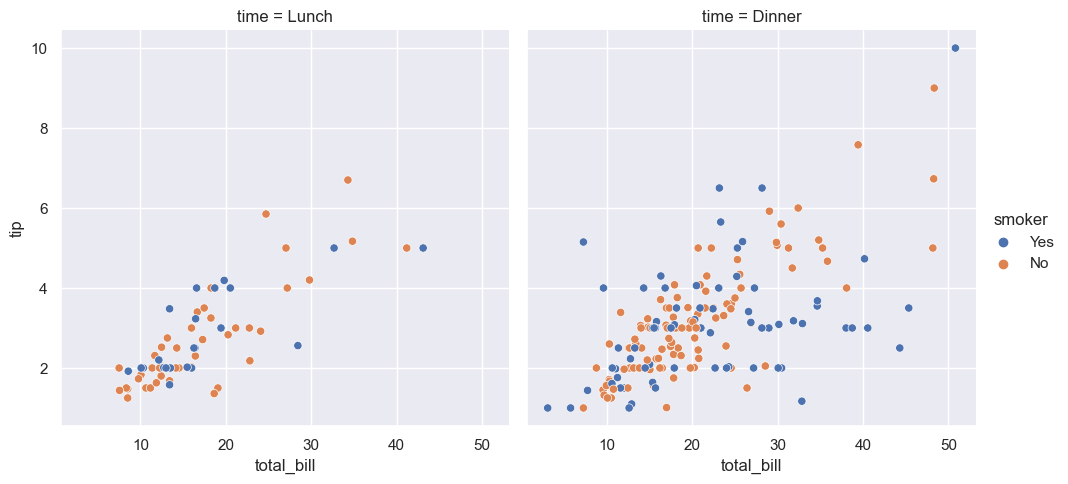

In [26]:
sns.relplot(data=tips,
           x='total_bill', y='tip', hue='smoker', col='time');

같은 방법으로, 두 개 변수의 영향을 표현할 수도 있습니다 : 하나는 column 방향으로, 다른 하나는 row 방향으로 facet 하면 됩니다. 
그리드에 더 많은 변수를 추가하고 싶으면 아마 figure size를 줄이고 싶을 것입니다. 
`FacetGrid`의 크기는 각 facet의 height(높이)와 aspect ratio(종횡비)에 따라 parameterized(매개변수화)된다는 것을 기억해두세요.

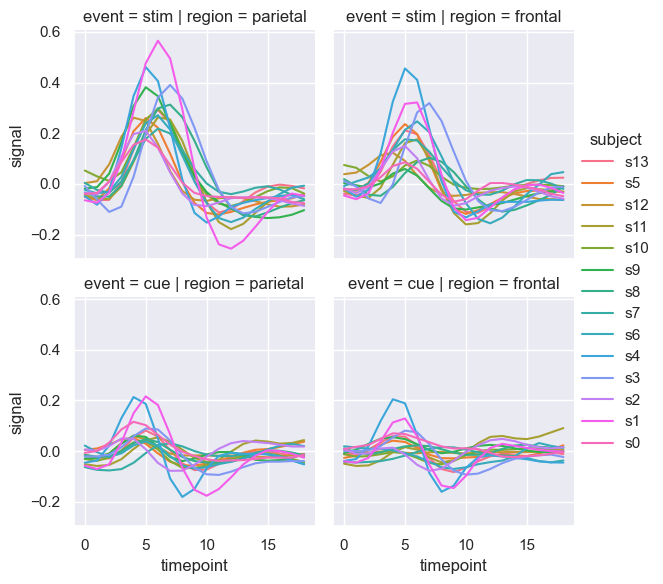

In [28]:
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', hue='subject',
    col='region', row='event', height=3, estimator=None
);

변수의 여러 레벨에 대한 효과를 확인하고 싶을 경우, 해당 변수(column)로 facet하고 row로 'wrap'을 해주면 됩니다.

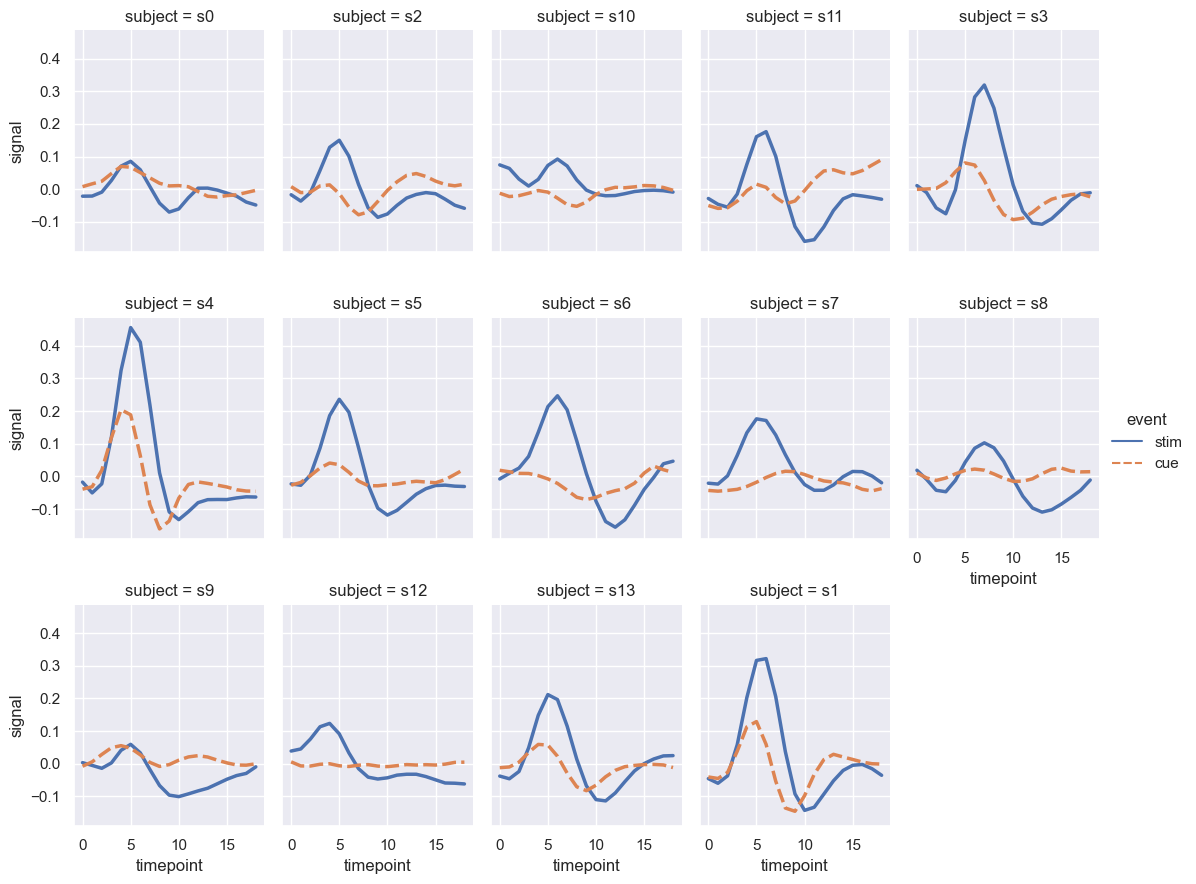

In [31]:
sns.relplot(
    data=fmri.query('region=="frontal"'), kind='line',
    x='timepoint', y='signal', hue='event', style='event',
    col='subject', col_wrap=5, height=3, aspect=.75, linewidth=2.5
);

이런 시각화 방법을 '격자(lattice)'plot 혹은 '작은여러개(small-multiples)'라고 부릅니다. 
이 방법은 눈으로 전체 패턴과 패턴의 편차를 모두 쉽게 감지할 수 있도록 데이터를 표시해줘서 효과적입니다. 
`scatterplot()`과 `relplot()`의 유연한 기능들을 활용하되, 단순한 plot을 여러개 만드는 것이 하나의 복잡한 plot 보다 대체로 더 효과적이라는 것을 기억하세요.